In [1]:
import numpy as np
import pandas as pd
# 按类型区分获得前三的电影

# 显示完整的列
pd.set_option('display.max_columns', None)
# 显示完整的行
pd.set_option('display.max_rows', None)
# 设置不折叠数据
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', 100)
df = pd.read_excel(r'E:\python\Code\analysis_final\DouBanMovie\DouBanMovie\douBan_details.xlsx')

# DataFrame 选取其中的三列数据
filmType = df[['name', 'score', 'film_type']]

# 清除df中所有的空格
filmType.replace('\s+','', regex=True, inplace=True)

# 将area中的数据按','进行划分,按最多的划分次数,
df.film_type = filmType.film_type.str.split(pat=',', n=-1, expand=False)
# print(df.film_type)

# 将电影名称和电影评分数组合并在一起
name_and_score = np.array([df.name.values, df.score.values])
# 将电影名字和电影评分根据电影类型个数重复
name_and_score1 = np.repeat(name_and_score, list(map(len, df.film_type.values)), axis=1)
# 将二维数组转化成一维数组
areaArr = np.concatenate(df.film_type.values)
# print(areaArr)
# 将电影名称、电影评分、电影类型合成为数组
newValues = np.dstack((name_and_score1[0], name_and_score1[1], areaArr))
# print(newValues)

# 将二维的数据转为df
area = pd.DataFrame(data=newValues[0], columns=['movie', 'score', 'film_type'])
# print(area)

rank = area.sort_values('score', ascending=False)

# 将数据按地区分类
res = rank.groupby('film_type', group_keys=True).apply(lambda x: x.head(3)[:]).drop(axis=1, columns='film_type', inplace=False)

res


C:\Users\SJC\AppData\Local\Temp\ipykernel_24252\723003694.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filmType.replace('\s+','', regex=True, inplace=True)


movie score
film_type                      
传记        130         钢琴家   9.3
          72         末代皇帝   9.3
          62       当幸福来敲门   9.2
儿童        205         小鞋子   9.2
          544   你看起来好像很好吃   8.9
          692      地球上的星星   8.9
冒险        29         星际穿越   9.4
          26         盗梦空间   9.4
          91    指环王3：王者无敌   9.3
剧情        0        肖申克的救赎   9.7
          20       辛德勒的名单   9.6
          54         控方证人   9.6
动作        18      这个杀手不太冷   9.4
          89    指环王3：王者无敌   9.3
          435         七武士   9.3
动画        149        大闹天宫   9.4
          15         千与千寻   9.4
          42       机器人总动员   9.3
历史        21       辛德勒的名单   9.6
          477          茶馆   9.5
          87           活着   9.3
古装        151        大闹天宫   9.4
          53    大话西游之大圣娶亲   9.2
          127   大话西游之月光宝盒   9.0
同性        4          霸王别姬   9.6
          428          喜宴   9.0
          236        春光乍泄   9.0
喜剧        11         美丽人生   9.6
          113        鬼子来了   9.3
          64         触不可及   9.3
奇幻        150        大闹天宫   9.4
          16         千与千寻   9.4
          90    指环王3：王者无敌   9.3
家庭        86           活着   9.3
          136       海蒂和爷爷   9.3
          170        饮食男女   9.2
恐怖        452         惊魂记   9.0
          449        电锯惊魂   8.8
悬疑        55         控方证人   9.6
          25         盗梦空间   9.4
          183        窃听风暴   9.2
情色        190    西西里的美丽传说   8.9
          467         色，戒   8.6
惊悚        45          无间道   9.3
          81     蝙蝠侠：黑暗骑士   9.2
          265         红辣椒   9.1
战争        22       辛德勒的名单   9.6
          13         美丽人生   9.6
          95         乱世佳人   9.3
歌舞        38      三傻大闹宝莱坞   9.2
          194        音乐之声   9.1
          524         雨中曲   9.1
武侠        343        倩女幽魂   8.8
          611       新龙门客栈   8.7
          409  射雕英雄传之东成西就   8.7
灾难        9         泰坦尼克号   9.5
          388         釜山行   8.6
爱情        12         美丽人生   9.6
          3          霸王别姬   9.6
          6          阿甘正传   9.5
犯罪        1        肖申克的救赎   9.7
          56         控方证人   9.6
          19      这个杀手不太冷   9.4
科幻        31        楚门的世界   9.4
          24         盗梦空间   9.4
          28         星际穿越   9.4
纪录片       227         海豚湾   9.3
          680          海洋   9.1
          616         二十二   8.7
西部        123        让子弹飞   9.0
          659        燃情岁月   8.8
          400      被解救的姜戈   8.8
运动        106      摔跤吧！爸爸   9.0
          679          弱点   8.7
音乐        129         钢琴家   9.3
          40       放牛班的春天   9.3
          34        海上钢琴师   9.3

In [2]:
import numpy as np
import pandas as pd
# 每个国家或地区排名前三的电影

# 显示完整的列
pd.set_option('display.max_columns', None)
# 显示完整的行
pd.set_option('display.max_rows', None)
# 设置不折叠数据
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', 100)
df = pd.read_excel(r'E:\python\Code\analysis_final\DouBanMovie\DouBanMovie\douBan_details.xlsx')

# DataFrame 选取其中的三列数据
area = df[['name', 'score', 'area']]

# 清除df中所有的空格
area.replace('\s+','', regex=True, inplace=True)

# 将area中的数据按','进行划分,按最多的划分次数,
df.area = area.area.str.split(pat='/', n=-1, expand=False)
# print(df.area)

# 将电影名称和电影评分数组合并在一起
name_and_score = np.array([df.name.values, df.score.values])
# 将电影名字和电影评分根据地区个数重复
name_and_score1 = np.repeat(name_and_score, list(map(len, df.area.values)), axis=1)
# 将二维数组转化成一维数组
areaArr = np.concatenate(df.area.values)
# print(areaArr)
# 将电影名称、电影评分、所属地区合成为数组
newValues = np.dstack((name_and_score1[0], name_and_score1[1], areaArr))
# print(newValues)

# 将二维的数据转为df
area = pd.DataFrame(data=newValues[0], columns=['movie', 'score', 'area'])
# print(area)

rank = area.sort_values('score', ascending=False)

# 将数据按地区分类
res = rank.groupby('area', group_keys=True).apply(lambda x: x.head(3)[:]).drop(axis=1, columns='area', inplace=False)
res


C:\Users\SJC\AppData\Local\Temp\ipykernel_24252\97183859.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area.replace('\s+','', regex=True, inplace=True)


movie score
area                        
中国台湾 98           饮食男女   9.2
     159            一一   9.1
     66       少年派的奇幻漂流   9.1
中国大陆 1            霸王别姬   9.6
     252            茶馆   9.5
     289       背靠背，脸对脸   9.5
中国香港 2            霸王别姬   9.6
     290       背靠背，脸对脸   9.5
     48             活着   9.3
丹麦   149            狩猎   9.1
伊朗   116           小鞋子   9.2
加拿大  7           泰坦尼克号   9.5
     17           星际穿越   9.4
     70           猫鼠游戏   9.1
匈牙利  355          火星救援   8.5
南非   241         卢旺达饭店   8.9
卡塔尔  60           何以为家   9.1
印度   22        三傻大闹宝莱坞   9.2
     55         摔跤吧！爸爸   9.0
     383        地球上的星星   8.9
塞浦路斯 59           何以为家   9.1
墨西哥  5           泰坦尼克号   9.5
奥地利  169       爱在黎明破晓前   8.8
巴西   249          上帝之城   9.0
     155     请以你的名字呼唤我   8.9
希腊   262       爱在午夜降临前   8.9
德国   80          海蒂和爷爷   9.3
     78            钢琴家   9.3
     25         放牛班的春天   9.3
意大利  8            美丽人生   9.6
     39           末代皇帝   9.3
     21          海上钢琴师   9.3
捷克   364          谍影重重   8.6
摩纳哥  375            海洋   9.1
新西兰  50      指环王3：王者无敌   9.3
     83      指环王2：双塔奇兵   9.2
     90      指环王1：护戒使者   9.1
日本   9            千与千寻   9.4
     228           七武士   9.3
     79           天空之城   9.2
比利时  380            香水   8.5
法国   10        这个杀手不太冷   9.4
     76            钢琴家   9.3
     41           末代皇帝   9.3
波兰   77            钢琴家   9.3
泰国   307        初恋这件小事   8.5
澳大利亚 6           泰坦尼克号   9.5
     202        玛丽和马克思   8.9
     321  疯狂的麦克斯4：狂暴之路   8.7
爱尔兰  331            房间   8.8
瑞典   150            狩猎   9.1
     198  一个叫欧维的男人决定去死   8.9
瑞士   81          海蒂和爷爷   9.3
     24         放牛班的春天   9.3
     371            海洋   9.1
约旦   356          火星救援   8.5
美国   0          肖申克的救赎   9.7
     31           控方证人   9.6
     12         辛德勒的名单   9.6
英国   20        忠犬八公的故事   9.4
     16           星际穿越   9.4
     14           盗梦空间   9.4
西班牙  372            海洋   9.1
     269          荒蛮故事   8.8
     113        看不见的客人   8.8
阿根廷  268          荒蛮故事   8.8
阿联酋  374            海洋   9.1
韩国   32             熔炉   9.4
     52             素媛   9.3
     97            辩护人   9.2
黎巴嫩  56           何以为家   9.1

C:\Users\SJC\AppData\Local\Temp\ipykernel_24252\4118444088.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time.replace('\s+','', regex=True, inplace=True)
C:\Users\SJC\AppData\Local\Temp\ipykernel_24252\4118444088.py:19: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.time = time.upTime.str.split(pat=',', n=-1, expand=False)


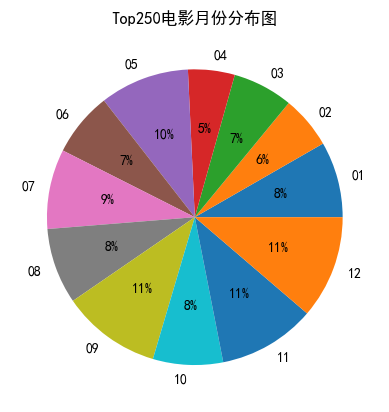

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 获取Top250电影月份分布图

pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.width', 1000)
# 显示完整的行
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 1000)
df = pd.read_excel(r'E:\python\Code\analysis_final\DouBanMovie\DouBanMovie\douBan_details.xlsx')

# DataFrame 选取其中的两列数据
time = df[['name', 'upTime']]
# 清除df中所有的空格
time.replace('\s+','', regex=True, inplace=True)
# 将time中的数据按','进行划分,按最多的划分次数,
df.time = time.upTime.str.split(pat=',', n=-1, expand=False)
# print(df.time)
# 将每一个电影的多个上映时间拆分为每一列只对应一个时间，每个电影拆分为多列
newValues = np.dstack((np.repeat(df.name.values, list(map(len, df.time.values))),
                       np.concatenate(df.time.values)))
# print(newValues[0])

# 将二维的数据转为df
time = pd.DataFrame(data=newValues[0], columns=['movie', 'time'])

# 将时间进行分为年月日地点 expand=True表示转化为dataFrame
time_temp = time['time'].str.split('[-()/]', expand=True)

# 连接两个dataFrame对象
time = pd.concat([time, time_temp], axis=1)

# 删除原来的时间列和列标为4的空白列
time = time.drop(columns=[4, 'time'], inplace=False, axis=1)

# 将列标重命名
time.rename(columns={0: 'year', 1: 'month', 2: 'day', 3: 'area'}, inplace=True)
time.groupby(['month']).size().plot(kind='pie', y=1, autopct='%1.0f%%')
plt.title("Top250电影月份分布图")
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()



将为您显示5条电影信息的星级分布,请输入0-245中的一个数作为起始点1:1
将为您显示5条电影信息的星级分布,请输入0-245中的一个数作为起始点2:240


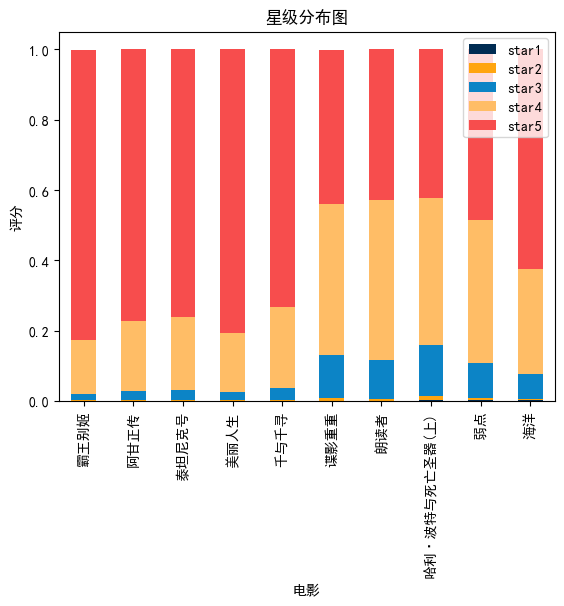

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
# 获得星级分布图，以便分析每部电影的1-5星分布


def percentage(begin1, begin2):
    # 读取数据
    df = pd.read_excel(r'E:\python\Code\analysis_final\DouBanMovie\DouBanMovie\douBan_details.xlsx')
    # 将每个星级字符型的百分比转为小鼠与电影分数相乘求出由该星级打分所获得的分数
    df["star1"] = df['star1'].str.strip("%").astype(float) / 100
    df["star1_value"] = df["star1"].values * df["score"].values

    df["star2"] = df['star2'].str.strip("%").astype(float) / 100
    df["star2_value"] = df["star2"].values * df["score"].values

    df["star3"] = df['star3'].str.strip("%").astype(float) / 100
    df["star3_value"] = df["star3"].values * df["score"].values

    df["star4"] = df['star4'].str.strip("%").astype(float) / 100
    df["star4_value"] = df["star4"].values * df["score"].values

    df["star5"] = df['star5'].str.strip("%").astype(float) / 100
    df["star5_value"] = df["star5"].values * df["score"].values

    # 将获得的起始点转为int型方便计算
    begin1 = int(begin1)
    begin2 = int(begin2)

    # 结束点为起始点加5
    tail1 = begin1 + 5
    tail2 = begin2 + 5

    # 截取数据
    df1 = df[begin1:tail1]
    df2 = df[begin2:tail2]

    # 拼接数据
    df_fn = pd.concat([df1, df2])

    # 绘制叠加柱形图
    df_fn.plot.bar(x='name', y=['star1', 'star2', 'star3', 'star4', 'star5'], stacked=True,
                   color=['#002c53', '#ffa510', '#0c84c6', '#ffbd66', '#f74d4d'])
    # 设置标题
    plt.xlabel('电影')
    plt.ylabel('评分')
    plt.title("星级分布图")
    plt.rcParams['font.sans-serif'] = ['SimHei']
    # 设置图例位置
    plt.legend(loc='best')
    plt.show()


if __name__ == '__main__':
    # 为了使对照更加明显,让用户选择两个起始点，每个起始点开始显示5条数据
    head1 = input("将为您显示5条电影信息的星级分布,请输入0-245中的一个数作为起始点1:")
    head2 = input("将为您显示5条电影信息的星级分布,请输入0-245中的一个数作为起始点2:")
    percentage(head1, head2)


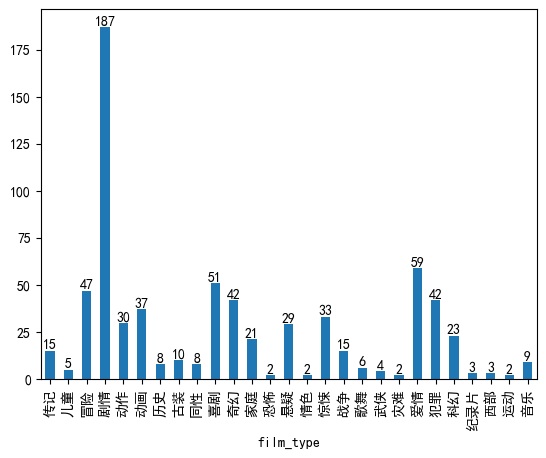

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 按照分类统计数量

pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 1000)
df = pd.read_excel(r'E:\python\Code\analysis_final\DouBanMovie\DouBanMovie\douBan_details.xlsx')


# DataFrame 选取其中的两列数据
filmType = df[['name', 'film_type']]
# 将film_type中的数据按','进行划分,按最多的划分次数,
df.film_type = filmType.film_type.str.split(pat=',', n=-1, expand=False)
# print(filmType.film_type)
# 将每一个电影的多个类型拆分为每一列只对应一个类型，每个电影拆分为多列
newValues = np.dstack((np.repeat(df.name.values, list(map(len, df.film_type.values))),
                       np.concatenate(df.film_type.values)))
# print(newValues[0])

# 将二维的数据转为df
filmType = pd.DataFrame(data=newValues[0], columns=filmType.columns)
# print(filmType)

# 按电影类型分组
df2 = filmType.groupby('film_type').size()
# print(df2)

# ax返回轴
ax = df2.plot.bar()

# 通过.patch获得条形图的矩形
for rect in ax.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), size=10, ha='center', va='bottom')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()


C:\Users\SJC\AppData\Local\Temp\ipykernel_24252\195787830.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area.replace('\s+','', regex=True, inplace=True)


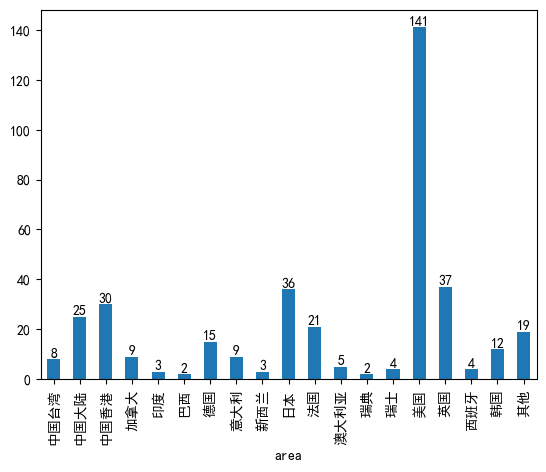

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 按照出品地区统计数量

pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 1000)
df = pd.read_excel(r'E:\python\Code\analysis_final\DouBanMovie\DouBanMovie\douBan_details.xlsx')

# DataFrame 选取其中的两列数据
area = df[['name', 'area']]
# 清除df中所有的空格
area.replace('\s+','', regex=True, inplace=True)
# 将area中的数据按'/'进行划分,按最多的划分次数,
df.area = area.area.str.split(pat='/', n=-1, expand=False)
# print(df.area)
# 将每一个电影的多个地区拆分为每一列只对应一个地区，每个电影拆分为多列
newValues = np.dstack((np.repeat(df.name.values, list(map(len, df.area.values))),
                       np.concatenate(df.area.values)))
# print(newValues[0])
# 将二维的数据转为df
area = pd.DataFrame(data=newValues[0], columns=['movie', 'area'])
# print(area)
# 将数据按地区分类并获得频次
df2 = area.groupby('area').size()
# 频次为1的国家计数器
ans = 0
# 频次为1的国家列表
arr = []
# 统计频次为1的国家
for i, v in df2.items():
    if v == 1:
        arr.append(i)
        ans = ans + 1
# print(arr)
# print(ans)
# 从df中清除频次为1的国家
df2.drop(arr, axis=0, inplace=True)
# print(df2)
# 将频次为1的国家统一为其他分类插入到df中
df2['其他'] = ans
# print(df2)
# ax返回轴
ax = df2.plot.bar()
# 通过.patch获得条形图的矩形
for rect in ax.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), size=10, ha='center', va='bottom')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()

